In [ ]:
''' 
По данной работе необходимо подготовить отчет в формате блокнота Jupyter 
Notebook (.ipynb) либо в текстовом виде (.pdf). В отчете должны быть: 
1) исходные коды 
2) результаты выполнения. 

Основная часть (10 баллов) 
В этом задании вам предстоит построить модель для прогнозирования цены 
недвижимости в зависимости от того, в каком районе Бостона она располагается. 
1. Загрузите данные из файла "boston.csv" о недвижимости в различных районах 
Бостона. Столбцы (признаки) имеют следующий смысл: 
    a. CRIM – уровень преступности 
    b. ZN – доля жилых земель, разделенных на участки площадью более 25 000 кв.футов 
    c. INDUS – доля площадей, не связанных с розничной торговлей 
    d. CHAS – наличие реки (1, если граничит с рекой; 0 в противном случае) 
    e. NOX – качество воздуха (концентрация оксидов азота) 
    f. RM – среднее количество комнат в доме 
    g. AGE – доля жилых помещений, построенных владельцами до 1940 года 
    h. DIS – взвешенные расстояния до пяти бостонских центров занятости 
    i. RAD – транспортная доступность (индекс доступности радиальных автомагистралей) 
    j. TAX – налоги (ставка налога на 10 000 долларов США) 
    k. PTRATIO – соотношение количества учеников и учителей 
    l. B – нормированное значение доли афроамериканцев среди жителей 
    m. LSTAT – процент населения с низким социальным статусом 
    n. MEDV – медианная цена недвижимости (тыс. $) – это и будет целевой признак 
2. Проверьте, что у всех загруженных данных числовой тип. 
3. Проверьте, есть ли по каким-либо признакам отсутствующие данные. Если 
отсутствующие данные есть – заполните их медианным значением. 
4. Посчитайте коэффициент корреляции для всех пар признаков. Подсказка: 
воспользуйтесь методом corr() для датафрейма, чтобы получить сразу всю 
корреляционную матрицу. 
5. С помощью одной из библиотек визуализации постройте тепловую карту 
(heatmap) по корреляционной матрице. 
6. Выберите от 4 до 6 признаков (на свое усмотрение), которые в наибольшей степени 
коррелируют с целевым признаком (ценой недвижимости). 
Справка. Коэффициент корреляции изменяется от -1 до 1. Значение -1 означает 
точную обратно-пропорциональную зависимость (чем меньше одна переменная, 
тем больше вторая, и наоборот). Значение 1 означает точную прямо
пропорциональную зависимость. Значение 0 означает полное отсутствие 
зависимости. Таким образом, чем ближе модуль коэффициента корреляции к 1, 
тем сильнее прослеживается зависимость между признаками. 
7. Для каждого из выбранных признаков в паре с целевым признаком постройте 
точечную диаграмму (диаграмму рассеяния). 
8. Визуально убедитесь, что связь между выбранным признаком и целевым 
прослеживается. Если на основе графика считаете, что зависимости нет – 
исключите этот признак из дальнейшего рассмотрения (но при этом как минимум 
3 признака должно остаться в любом случае). 
9. Сформируйте список факторных признаков и целевую переменную. 
10. Выполните разбиение датасета на обучающую и тестовую выборки в 
соотношении 8:2. При формировании обучающей и тестовой выборок строки из 
исходного датафрейма должны выбираться в случайном порядке. Подсказка: 
можно воспользоваться функцией train_test_split из библиотеки sklearn.model_selection. 
11. Из набора линейных моделей библиотеки sklearn возьмите линейную регрессию, 
обучите ее на обучающем наборе. 
12. Получите векторы прогнозных значений целевой переменной на обучающей и на 
тестовой выборках. 
13. Посчитайте коэффициент детерминации (R2) и корень из среднеквадратичной 
ошибки (RMSE) на обучающей и на тестовой выборках. 

Дополнительные задания (8 баллов) 
14. (1 балл) Постройте boxplot («ящик с усами») для целевого признака (MEDV). 
Определите, какие значения можно считать выбросами. 
Указание. Если по диаграмме выбросы определить не смогли, то для выполнения 
дальнейших действий считайте выбросами значения MEDV=50.0. 
15. (2 балла) Отфильтруйте исходные данные, удалив выбросы. Пересоздайте 
тестовую и обучающую выборки, переобучите модель. Посчитайте показатели R2 
и RMSE. Как они изменились? О чем это говорит? 
16. (2 балла) Из набора линейных моделей библиотеки sklearn возьмите гребневую 
регрессию (Ridge). Обучите модель. Посчитайте показатели R2 и RMSE. 
17. (3 балла) Постройте полиномиальную регрессию с использованием полинома 3й 
степени. Посчитайте показатели R2 и RMSE. Сравните все полученные результаты.
'''

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# 1. Загрузите данные из файла "boston.csv" о недвижимости в различных районах 
# Бостона. Столбцы (признаки) имеют следующий смысл: 
#    a. CRIM – уровень преступности 
#    b. ZN – доля жилых земель, разделенных на участки площадью более 25 000 кв.футов 
#    c. INDUS – доля площадей, не связанных с розничной торговлей 
#    d. CHAS – наличие реки (1, если граничит с рекой; 0 в противном случае) 
#    e. NOX – качество воздуха (концентрация оксидов азота) 
#    f. RM – среднее количество комнат в доме 
#    g. AGE – доля жилых помещений, построенных владельцами до 1940 года 
#    h. DIS – взвешенные расстояния до пяти бостонских центров занятости 
#    i. RAD – транспортная доступность (индекс доступности радиальных автомагистралей) 
#    j. TAX – налоги (ставка налога на 10 000 долларов США) 
#    k. PTRATIO – соотношение количества учеников и учителей 
#    l. B – нормированное значение доли афроамериканцев среди жителей 
#    m. LSTAT – процент населения с низким социальным статусом 
#    n. MEDV – медианная цена недвижимости (тыс. $) – это и будет целевой признак 

data = pd.read_csv("boston.csv")
print('Информация о загруженных данных:')
print(data.info())
print('Вывод первых 5 строк:')
data.head(5)

Информация о загруженных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
Вывод первых 5 строк:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 2. Проверьте, что у всех загруженных данных числовой тип.
# Из вывода информации о загруженных данных в пункте 1, можно сделать вывод что все значения имеют числовой тип "float64".
# Однако можно повторно проверить, выведя только типы:
print(f'Типы даных признаков: \n{data.dtypes}')

Типы даных признаков: 
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [4]:
# 3. Проверьте, есть ли по каким-либо признакам отсутствующие данные. Если 
# отсутствующие данные есть – заполните их медианным значением. 
# Из вывода информации о загруженных данных в пункте 1, можно сделать вывод, что по каким-либо признакам отсутствующие данных нет (везде 506 значений).
# Однако можно поаторно проверить, посчитав количество отсутствующие данных по признакам:

print(f'Колличкство отсутствующих данных по признакам: \n{data.isnull().sum()}')
# Отсутствующих данных нет.

# Если отсутствующие данные есть – заполните их медианным значением с помощью команды:
#data.fillna(data.median(), inplace=True)

Колличкство отсутствующих данных по признакам: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# 4. Посчитайте коэффициент корреляции для всех пар признаков. Подсказка: 
# воспользуйтесь методом corr() для датафрейма, чтобы получить сразу всю 
# корреляционную матрицу. 

correlation_matrix = data.corr()
print(f'Корреляционная матрица:')
correlation_matrix

Корреляционная матрица:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


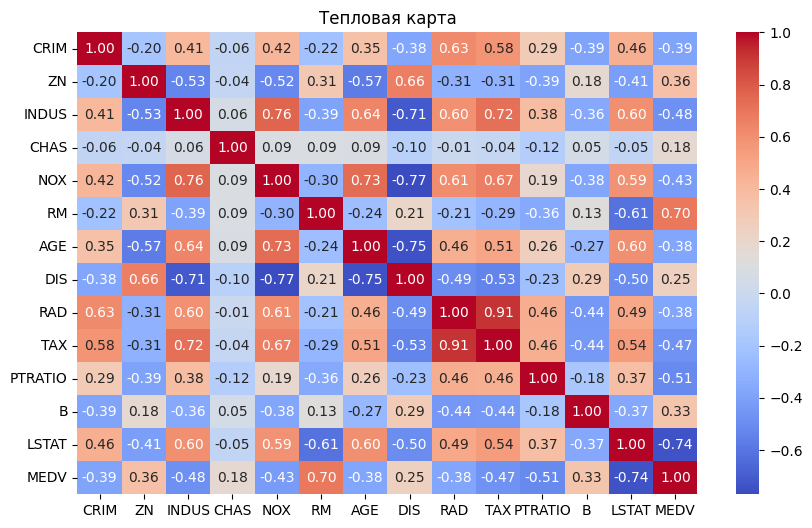

In [6]:
# 5. С помощью одной из библиотек визуализации постройте тепловую карту (heatmap) по корреляционной матрице.

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта')
plt.show()

In [7]:
# 6. Выберите от 4 до 6 признаков (на свое усмотрение), которые в наибольшей степени 
# коррелируют с целевым признаком (ценой недвижимости). 
# Справка. Коэффициент корреляции изменяется от -1 до 1. Значение -1 означает 
# точную обратно-пропорциональную зависимость (чем меньше одна переменная, 
# тем больше вторая, и наоборот). Значение 1 означает точную прямо
# пропорциональную зависимость. Значение 0 означает полное отсутствие 
# зависимости. Таким образом, чем ближе модуль коэффициента корреляции к 1, 
# тем сильнее прослеживается зависимость между признаками.

correlation_medv = correlation_matrix['MEDV'].abs().sort_values(ascending=False) # Сортировка по модулю
print(f'{correlation_medv}')
selected_correlation_medv = correlation_medv.index[1:7]  # выбираем 6 первых признаков без учёта самого MEDV
print(f'Выбранные признаки, которые в наибольшей степени коррелируют с целевым признаком (ценой недвижимости): \n{selected_correlation_medv}')

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64
Выбранные признаки, которые в наибольшей степени коррелируют с целевым признаком (ценой недвижимости): 
Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX'], dtype='object')


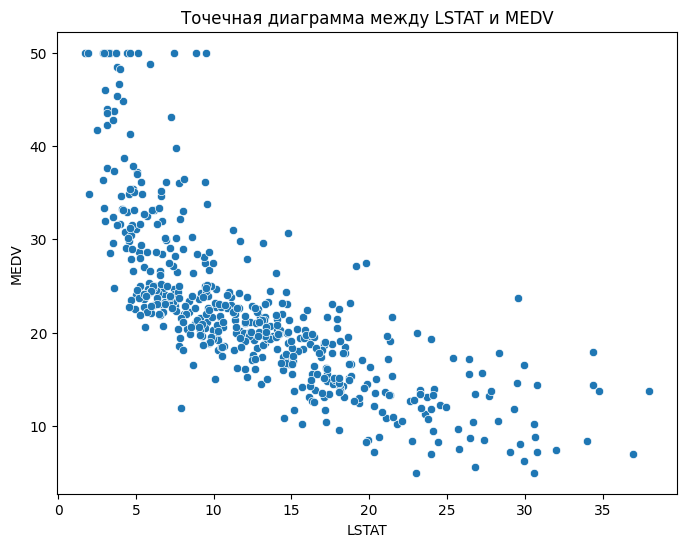

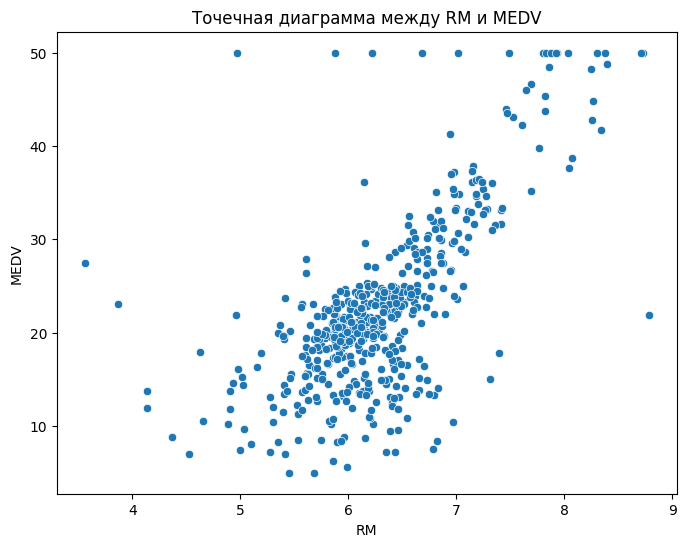

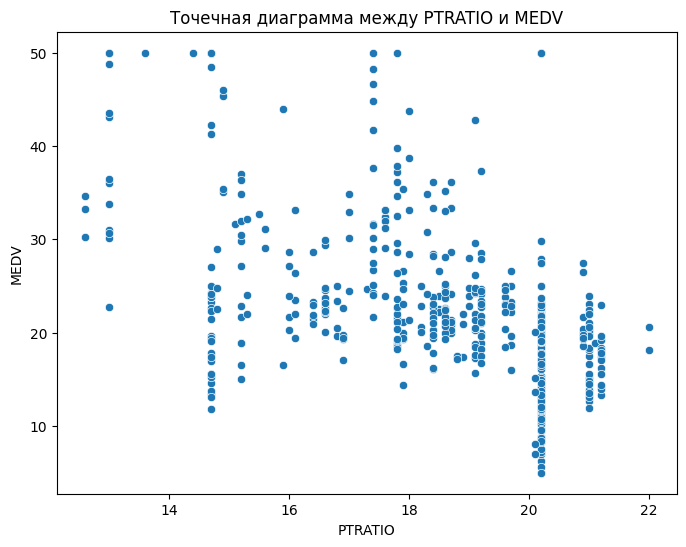

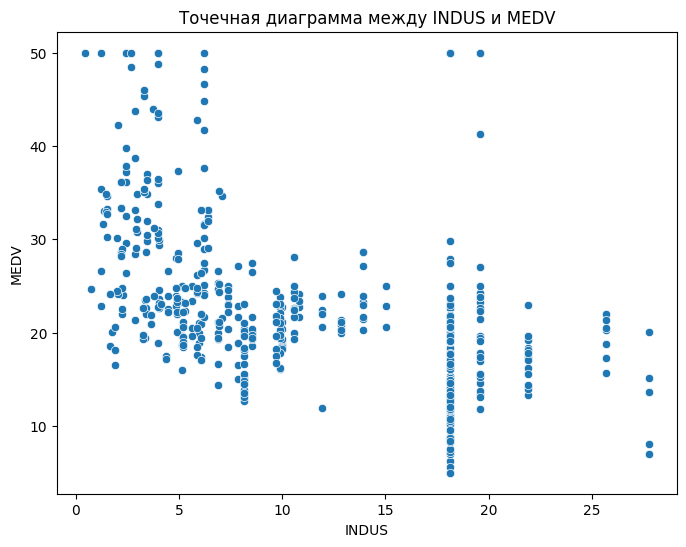

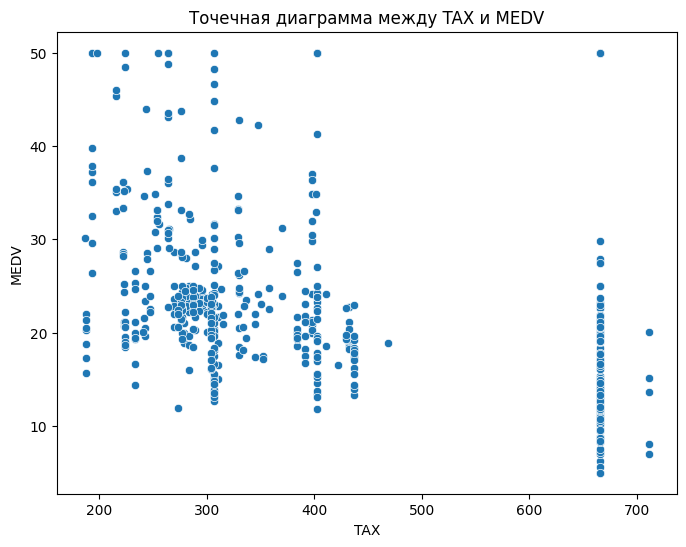

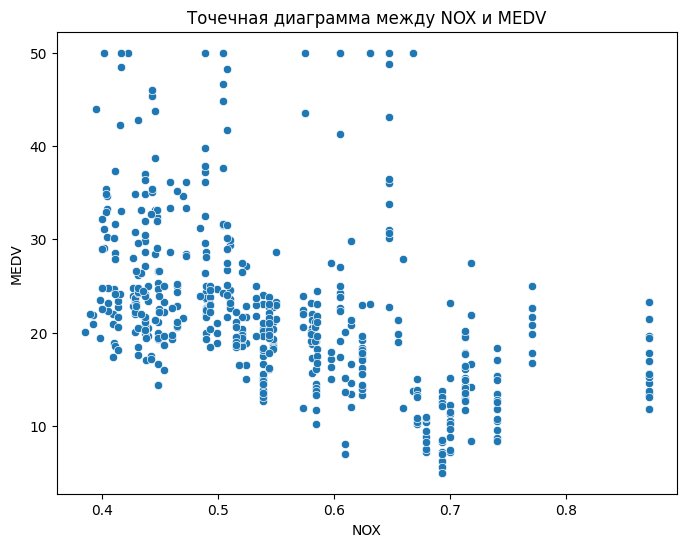

In [8]:
# 7. Для каждого из выбранных признаков в паре с целевым признаком постройте 
# точечную диаграмму (диаграмму рассеяния). 

for i in selected_correlation_medv:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=i, y='MEDV')
    plt.title(f'Точечная диаграмма между {i} и MEDV')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.show()

In [ ]:
# 8. Визуально убедитесь, что связь между выбранным признаком и целевым 
# прослеживается. Если на основе графика считаете, что зависимости нет – 
# исключите этот признак из дальнейшего рассмотрения (но при этом как минимум 
# 3 признака должно остаться в любом случае). 

# Визуально связь между выбранным признаком и целевым прослеживается у:
# 1) LSTAT - обратная зависимость, 
# 2) RM - прямая зависимость. 
# У остальных признаков связь не прослеживается - графики хаотичные.
# Так как надо оставить минимум 3 признака, в качестве 3 признака будет выбран признак с наибольшим коэффициентом корреляции из оставшихся: 
# 3) PTRATIO.

In [9]:
# 9. Сформируйте список факторных признаков и целевую переменную. 

selected_correlation_medv = selected_correlation_medv[:3]
X = data[selected_correlation_medv].copy()  # Выбранные факторные признаки
target_variable = correlation_medv.index[0]
y = data[target_variable].copy()  # Целевая переменная
print(f'Факторные признаки: {selected_correlation_medv}')
print(f'Целевая переменная: {target_variable}')
print(f'X: \n{X.head(5)}')
print(f'y: \n{y.head(5)}')

Факторные признаки: Index(['LSTAT', 'RM', 'PTRATIO'], dtype='object')
Целевая переменная: MEDV
X: 
   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   9.14  6.421     17.8
2   4.03  7.185     17.8
3   2.94  6.998     18.7
4   5.33  7.147     18.7
y: 
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [10]:
# 10. Выполните разбиение датасета на обучающую и тестовую выборки в 
# соотношении 8:2. При формировании обучающей и тестовой выборок строки из 
# исходного датафрейма должны выбираться в случайном порядке. Подсказка: 
# можно воспользоваться функцией train_test_split из библиотеки sklearn.model_selection. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, shuffle=True)
print(f'Размерность выборок \nОбучающая (X_train): {X_train.shape} \nТестовая (X_test): {X_test.shape}')

Размерность выборок 
Обучающая (X_train): (404, 3) 
Тестовая (X_test): (102, 3)


In [11]:
# 11. Из набора линейных моделей библиотеки sklearn возьмите линейную регрессию, обучите ее на обучающем наборе. 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 12. Получите векторы прогнозных значений целевой переменной на обучающей и на тестовой выборках. 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [13]:
# 13. Посчитайте коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) на обучающей и на тестовой выборках. 

# Коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) для обучающей выборки
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) для тестовой выборки
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Оценка модели:')
print(f'Обучающая выборка: R2 = {r2_train:.2f}, RMSE = {rmse_train:.2f}')
print(f'Тестовая выборка: R2 = {r2_test:.2f}, RMSE = {rmse_test:.2f}')

Оценка модели:
Обучающая выборка: R2 = 0.68, RMSE = 5.26
Тестовая выборка: R2 = 0.65, RMSE = 5.01


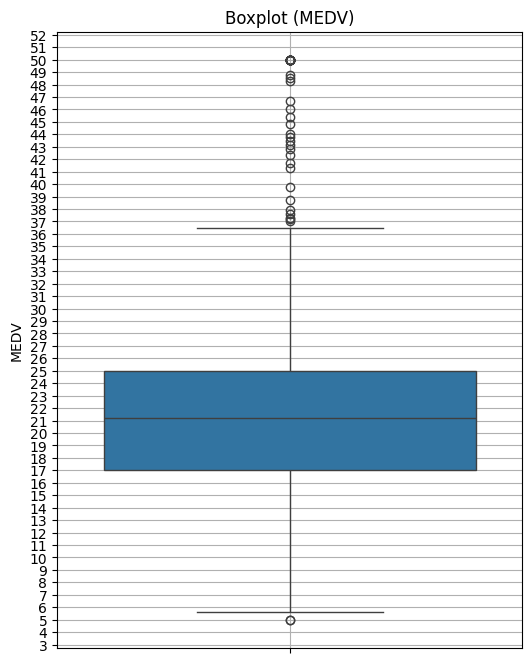

In [14]:
# Дополнительные задания (8 баллов)
# 14. (1 балл) Постройте boxplot («ящик с усами») для целевого признака (MEDV). 
# Определите, какие значения можно считать выбросами. 
# Указание. Если по диаграмме выбросы определить не смогли, то для выполнения 
# дальнейших действий считайте выбросами значения MEDV=50.0. 

plt.figure(figsize=(6, 8))
sns.boxplot(data['MEDV'])
plt.title('Boxplot (MEDV)')
plt.grid(True)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

# Из графика ниже можно сделать вывод, что 
# нижняя граница где то 5,5
# верхняя граница где то 36,5

In [ ]:
# Расчитаем количество выбросов
count_outliers_below = len(data[data['MEDV'] < 5.5])
count_outliers_above = len(data[data['MEDV'] > 36.5])
count_outliers = count_outliers_below + count_outliers_above
count_data = len(data)
percent = count_outliers/count_data*100

print(f'Вычесленные выбросы:')
print(f'Выбросы по нижней границе: {count_outliers_below}')
print(f'Выбросы по верхней границе: {count_outliers_above}')
print(f'Всего выбрасов: {count_outliers}')
print(f'Процентное соотношение выбросом с общим количеством записей: {percent:.2f} %')

# Указание. Если по диаграмме выбросы определить не смогли, то для выполнения 
# дальнейших действий считайте выбросами значения MEDV=50.0. 

# Расчитаем количество и процентноее соотношение
count_outliers_above2 = len(data[data['MEDV'] == 50])
percent2 = count_outliers_above2/count_data*100
print(f'\nВычесленные выбросы при MEDV=50.0:')
print(f'Всего выбрасов: {count_outliers_above2}')
print(f'Процентное соотношение выбросом с общим количеством записей: {percent2:.2f} %')

# Впринципе 7,91 % вычесленных выбросов от общего числа допустимо опустить, поэтому
# в дальнейшем будут исключаться данные выбросы, где значение (MEDV < 5.5) или (MEDV > 36.5)

Вычесленные выбросы:
Выбросы по нижней границе: 2
Выбросы по верхней границе: 38
Всего выбрасов: 40
Процентное соотношение выбросом с общим количеством записей: 7.91 %

Вычесленные выбросы при MEDV=50.0:
Всего выбрасов: 16
Процентное соотношение выбросом с общим количеством записей: 3.16 %


In [16]:
# 15. (2 балла) Отфильтруйте исходные данные, удалив выбросы. Пересоздайте 
# тестовую и обучающую выборки, переобучите модель. Посчитайте показатели R2 
# и RMSE. Как они изменились? О чем это говорит? 

# Удаление выбросов, где (MEDV < 5.5) или (MEDV > 36.5)
data_filtered = data[(data['MEDV'] >= 5.5) & (data['MEDV'] <= 36.5)].copy()
# print(len(data_filtered)) # Осталось 466 из 506 (40 выбрасов убраны)
X_filtered = data_filtered[selected_correlation_medv].copy()  # Выбранные факторные признаки
y_filtered = data_filtered[target_variable].copy()  # Целевая переменная

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=69, shuffle=True)

model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

y_train_pred_filtered = model_filtered.predict(X_train_filtered)
y_test_pred_filtered = model_filtered.predict(X_test_filtered)

# Коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) для обучающей выборки без выбросов
r2_train_filtered = r2_score(y_train_filtered, y_train_pred_filtered)
rmse_train_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_filtered))

# Коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) для тестовой выборки без выбросов
r2_test_filtered = r2_score(y_test_filtered, y_test_pred_filtered)
rmse_test_filtered = np.sqrt(mean_squared_error(y_test_filtered, y_test_pred_filtered))

print('Оценка модели с выбросами:')
print(f'Обучающая выборка: R2 = {r2_train:.3f}, RMSE = {rmse_train:.3f}')
print(f'Тестовая выборка: R2 = {r2_test:.3f}, RMSE = {rmse_test:.3f}')

print('\nОценка модели без выбросами:')
print(f'Обучающая выборка: R2 = {r2_train_filtered:.3f}, RMSE = {rmse_train_filtered:.3f}')
print(f'Тестовая выборка: R2 = {r2_test_filtered:.3f}, RMSE = {rmse_test_filtered:.3f}')

# R2 (Коэффициент детерминации, который измеряет, насколько хорошо регрессионная модель соответствует реальным данным):
# (Чем больше R2, тем лучше)
# В обучающей выборке: немного уменьшиля (немного стало хуже).
# В тестовой выборке: стал больше (стало лучше).

# RMSE (стандартное отклонение остатков, которое указывает на средний размер ошибок):
# (Чем меньше RMSE, тем лучше)
# В обучающей выборке: стал меньше (стало лучше).
# В тестовой выборке: стал меньше (стало лучше).

# Таким образом можно сделать вывод, что надёжности модели повисилась.

# Однако при удалении выбросов стоит помнить, что удалённые выбросы могут быть ДОСТОВЕРНЫМИ (не являются ошибкой), 
# т.е. уникальными значениями в редко встречаемых событиях в датасете, на которые повлияли какие-либо обстоятельства,
# от чего модель без выбросов может плохо справляться в таких ситуациях, чем модель, обученная с выбрасами.
# *Так же стоит учитывать, что результат обученной модели зависит и от данных, которые использовались в обучающей и тестовой выборке.
# Разные комбинации из одного и того же датасета для обучающей и тестовой выборок будут давать разные результаты при оценке (R2, RMSE).

Оценка модели с выбросами:
Обучающая выборка: R2 = 0.684, RMSE = 5.261
Тестовая выборка: R2 = 0.652, RMSE = 5.008

Оценка модели без выбросами:
Обучающая выборка: R2 = 0.677, RMSE = 3.601
Тестовая выборка: R2 = 0.685, RMSE = 3.844


In [17]:
# 16. (2 балла) Из набора линейных моделей библиотеки sklearn возьмите гребневую 
# регрессию (Ridge). Обучите модель. Посчитайте показатели R2 и RMSE.

# Обучение гребневой регрессии (Ridge)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Прогнозирование с использованием гребневой регрессии
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# R2 и RMSE для гребневой регрессии
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print('Оценка модели гребневой регрессии:')
print(f'Обучающая выборка: R2 = {r2_train_ridge:.2f}, RMSE = {rmse_train_ridge:.2f}')
print(f'Тестовая выборка: R2 = {r2_test_ridge:.2f}, RMSE = {rmse_test_ridge:.2f}')

Оценка модели гребневой регрессии:
Обучающая выборка: R2 = 0.68, RMSE = 5.26
Тестовая выборка: R2 = 0.65, RMSE = 5.01


In [18]:
# 17. (3 балла) Постройте полиномиальную регрессию с использованием полинома 3й 
# степени. Посчитайте показатели R2 и RMSE. Сравните все полученные результаты.

# Создание полиномиальной регрессии с полиномом 3-й степени
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)

# Прогнозирование с использованием полиномиальной регрессии с использованием полинома 3й степени
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Оценка модели: R2 и RMSE для полиномиальной регрессии 
r2_train_poly = r2_score(y_train, y_train_pred_poly)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
r2_test_poly = r2_score(y_test, y_test_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print('Оценка полиномиальной регрессии (3-й степени):')
print(f'Обучающая выборка: R2 = {r2_train_poly:.2f}, RMSE = {rmse_train_poly:.2f}')
print(f'Тестовая выборка: R2 = {r2_test_poly:.2f}, RMSE = {rmse_test_poly:.2f}')

Оценка полиномиальной регрессии (3-й степени):
Обучающая выборка: R2 = 0.83, RMSE = 3.85
Тестовая выборка: R2 = 0.70, RMSE = 4.62


In [ ]:
# Для удобства собрал все результаты в единый датафрейм
result = pd.DataFrame([
    ["Линейная регрессия (с выбрасами)", r2_train, rmse_train, r2_test, rmse_test],
    ["Линейная регрессия (без выбросов)", r2_train_filtered, rmse_train_filtered, r2_test_filtered, rmse_test_filtered],
    ["Гребневая регрессия (Ridge)", r2_train_ridge, rmse_train_ridge, r2_test_ridge, rmse_test_ridge],
    ["Полиномиальная регрессия (полином 3-й степени)", r2_train_poly, rmse_train_poly, r2_test_poly, rmse_test_poly],
], columns=["Модель","R2(train)","RMSE(train)","R2(test)","RMSE(test)"])

result

# *Стоит отметить, что:
# Линейная регрессия (с выбрасами), Гребневая регрессия (Ridge), Полиномиальная регрессия (полином 3-й степени) обучались и проверялись на
# одной и той же обучающейся и тестовой выборке, а Линейная регрессия (без выбросов) обучалась на другой обучающейся и тестовой выборке,
# из которой были удалены выбросы

# R2 (Коэффициент детерминации, который измеряет, насколько хорошо регрессионная модель соответствует реальным данным):
# (Чем больше R2, тем лучше)
# В обучающей и тестовой выборках наилучшим образом себя показала модель - Полиномиальная регрессия (полином 3-й степени)
# В остальных моделях R2 +- на одном значении

# RMSE (стандартное отклонение остатков, которое указывает на средний размер ошибок):
# (Чем меньше RMSE, тем лучше)
# В обучающей и тестовой выборках наилучшим образом себя показала модель - Линейная регрессия (без выбросов),
# однако стоит заметить, что в данной модели выбросы не учитывались, как в остальных моделях.
# Если учитывать выбросы, то среди оставшихся 3 моделей лучшим образом себя показала модель - Полиномиальная регрессия (полином 3-й степени)

# Таким образом, можно сделать вывод, что зависимость между целевой переменной 'MEDV' и факторными признаками 'LSTAT', 'RM', 'PTRATIO'
# лучше всего описала модель - Полиномиальная регрессия (полином 3-й степени)

# где:
#    f. RM – среднее количество комнат в доме 
#    k. PTRATIO – соотношение количества учеников и учителей 
#    m. LSTAT – процент населения с низким социальным статусом 
#    n. MEDV – медианная цена недвижимости (тыс. $) – это и будет целевой признак 

,Модель,R2(train),RMSE(train),R2(test),RMSE(test)
0,Линейная регрессия (с выбрасами),0.683890,5.260671,0.651806,5.008015
1,Линейная регрессия (без выбросов),0.676885,3.601397,0.684946,3.843786
2,Гребневая регрессия (Ridge),0.683886,5.260705,0.651629,5.009289
3,Полиномиальная регрессия (полином 3-й степени),0.830455,3.852695,0.703090,4.624529
